# Predicting Heart Disease using Machine Learning

## 1. Problem Definition

In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

## 2. Data

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features 

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

## 5. Heart Disease Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

## 6. Tools

Tools that used in this project:

1. **pandas** for data analysis.
2. **NumPy** for numerical operations.
3. **Matplotlib/Seaborn** for plotting or data visualization.
4. **Scikit-Learn** for machine learning modelling and evaluation.

# Scikit-Learn Map

![Scikit-Learn Map](https://scikit-learn.org/stable/_static/ml_map.png)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

## Load Data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape # (rows, columns)

(303, 14)

In [9]:
df.target.value_counts() # Positive (1) and Negative (0)

1    165
0    138
Name: target, dtype: int64

Since these two values are close to even, our `target` column can be considered **balanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

If you'd prefer these values in percentages, `value_counts()` takes a parameter, `normalize` which can be set to true.

In [10]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Another way to get some quick insights on your dataframe is to use `df.describe()`. `describe()` shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Making Crosstab Visual

### Heart Disease Frequency per Gender

In [20]:
df.sex.value_counts() # 1 = Male, 0 = Female

1    207
0     96
Name: sex, dtype: int64

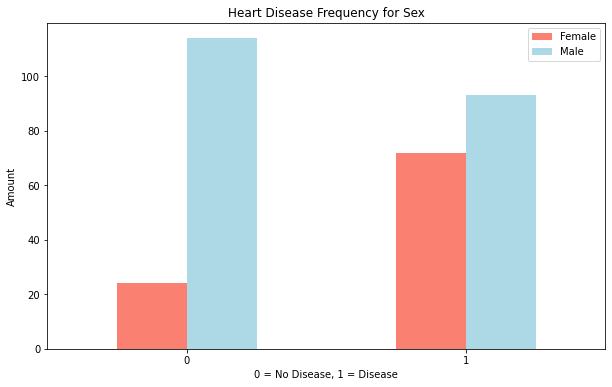

In [15]:
# Create Plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); 

### Age vs Max Heart rate for Heart Disease

Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

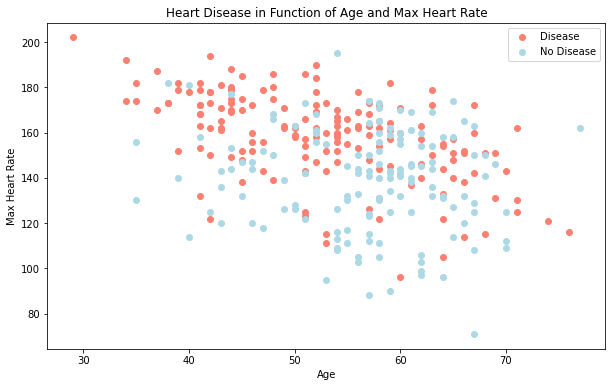

In [23]:
# Create figure
plt.figure(figsize=(10, 6))

# Positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age **distribution**.

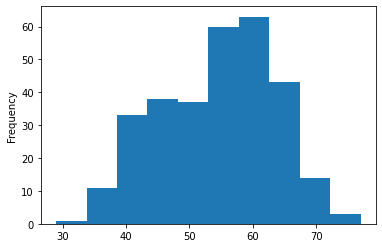

In [25]:
# Check the distribution of a variable
df.age.plot.hist();

## Correlation Between Independent Variables

this may give an idea of which independent variables may or may not have an impact on our target variable.

In [26]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Make it look prettier

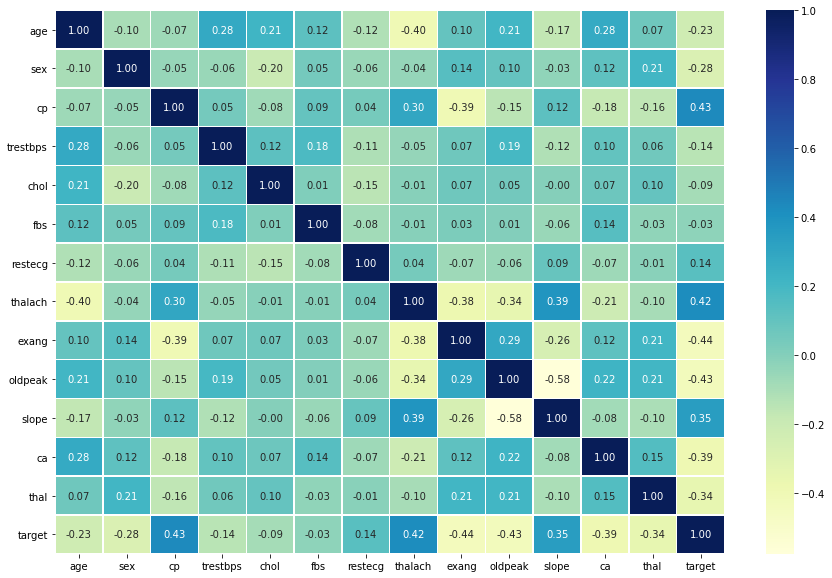

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## Modeling

We'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We split the target variable from the rest.

In [33]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

In [31]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Training and Test Split

In [36]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model Choices

We'll be using the following and comparing their result.

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForest()`

In [40]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict if differet Scikit-Learn machine learning models
    X_train: training data
    X_Test: test data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [41]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

/Users/nabilfatih/Desktop/heart-disease-classification/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Model Comparison

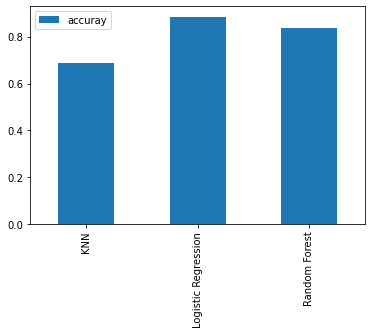

In [44]:
model_compare = pd.DataFrame(model_scores, index=['accuray'])
model_compare.T.plot.bar();

We can see from the comparison that `LogisticRegression()` model performs best.

And now, can we improve the accuracy?

## Hyperparameter Tuning and Cross-Validation

We'll use `GridSearchCV()` for tuning the model.

**Note:** If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. On that case, we can use `RandomizedSearchCV()`. But since our data not too large, so we directly use `GridSearchCV()`.

In [53]:
# Different LogisticRegession Hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 100),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,
                          n_jobs=-1)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-0...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [54]:
gs_log_reg.best_params_

{'C': 0.20565123083486536, 'solver': 'liblinear'}

In [55]:
model_log_reg = LogisticRegression(C=0.20565123083486536, solver='liblinear')
model_log_reg.fit(X_train, y_train)
model_log_reg.score(X_test, y_test)

0.8852459016393442

In this case, we get the same results as before since our grid only has a maximum of 100 different hyperparameter combinations.

## Evaluating a Classification Model, Beyond Accuracy

Metrics that we used:

* ROC curve and AUC score - `plot_roc_curve()`
* Confusion matrix - `confusion_matrix()`
* Classification report - `classification_report()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-score - `f1_score()` 

In [56]:
# Make predictions on test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### ROC Curve and AUC Scores

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

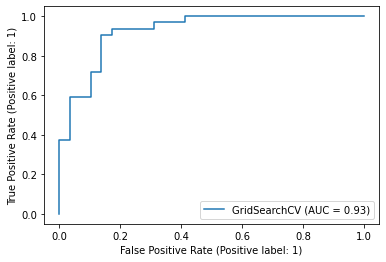

In [57]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

Our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

### Confusion Matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [58]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


#### Visualization the Confusion Matrix

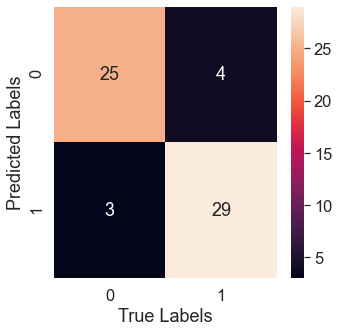

In [60]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")

plot_conf_mat(y_test, y_preds)

The model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

### Classification Report

A classification report will also give us information of the precision and recall of our model for each class.

In [61]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [62]:
# Check best hyperparamters
gs_log_reg.best_params_

{'C': 0.20565123083486536, 'solver': 'liblinear'}

In [63]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.20565123083486536, solver='liblinear')

In [84]:
def cv_metrics(clf, X, y):
    # Make a Dict
    metrics = {"Accuracy": np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy")),
               "Precision": np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision")),
               "Recall": np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall")),
               "F1-Score": np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))}
    metrics_scores = {}
    for name, metric in metrics.items():
        metrics_scores[name] = metric
    
    # Visualizing cross-validated metrics
    cv_metrics_vis = pd.DataFrame(metrics, index=[0])
    cv_metrics_vis.T.plot.bar(title="Cross-validated Metrics", legend=False)
    return metrics_scores

{'Accuracy': 0.8479781420765027,
 'Precision': 0.8215873015873015,
 'Recall': 0.9272727272727274,
 'F1-Score': 0.8705403543192143}

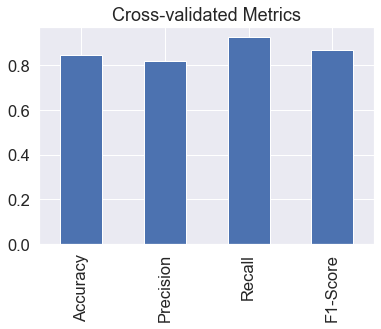

In [85]:
metrics_scores = cv_metrics(clf, X, y)
metrics_scores

## Feature Importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

In [86]:
# Fit an instance of LogisicRegression (taken from above)
clf.fit(X_train, y_train)

LogisticRegression(C=0.20565123083486536, solver='liblinear')

In [87]:
# Check coef_
clf.coef_

array([[ 0.00319924, -0.86313351,  0.66127318, -0.01156812, -0.00166163,
         0.04355888,  0.31487019,  0.02461393, -0.60586029, -0.56860574,
         0.45182686, -0.63590762, -0.67978937]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this `coef_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [88]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031992427494907947,
 'sex': -0.8631335136081748,
 'cp': 0.6612731817103128,
 'trestbps': -0.011568115564302954,
 'chol': -0.0016616270808191324,
 'fbs': 0.043558876764809906,
 'restecg': 0.3148701873614556,
 'thalach': 0.02461393412557196,
 'exang': -0.6058602864971772,
 'oldpeak': -0.5686057412593252,
 'slope': 0.4518268594038065,
 'ca': -0.6359076156242102,
 'thal': -0.6797893708001093}

### Visualize them

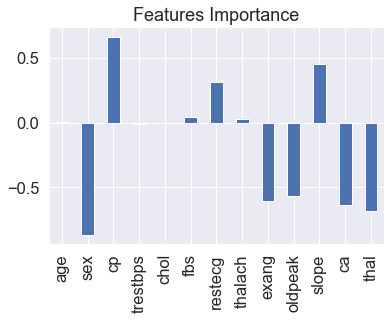

In [89]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Features Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values. 

For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.

## Experimention

we've completed all the metrics that we want to do.

did we meet the evaluation metric?

Remember we defined one in step 3.

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

So this experimentation is still keep going

**To be Continue**